In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import RFE, SelectKBest, chi2, f_classif
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from xgboost import XGBClassifier, XGBRegressor

In [21]:
from sqlalchemy import create_engine

In [22]:
engine = create_engine(
    "mssql+pyodbc://DESKTOP-ALEGQ73\SQLEXPRESS/ML?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes")
train = pd.read_sql("SELECT * FROM train", engine)
train

<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
C:\Users\user\AppData\Local\Temp\ipykernel_1992\2413514979.py:2: SyntaxWarning: invalid escape sequence '\S'
  "mssql+pyodbc://DESKTOP-ALEGQ73\SQLEXPRESS/ML?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes")


,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,None,34.152199,-118.390999,2020-03-09,2020-03-06,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,None,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.002800,-118.239098,2020-02-27,2020-02-27,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,None,34.011101,-118.265297,2020-08-21,2020-08-21,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,None,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,None,34.295300,-118.459000,2020-11-08,2020-11-06,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,None,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,None,33.978699,-118.291801,2020-02-25,2020-02-25,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19989,5100 W ADAMS BL,None,34.033401,-118.352303,2020-05-24,2020-05-24,700.0,3.0,Southwest,303.0,...,51.0,M,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Violent Crimes
19990,16900 ROSCOE BL,None,34.221199,-118.501099,2020-12-25,2020-12-25,259.0,10.0,West Valley,1008.0,...,0.0,M,W,301.0,GAS STATION,NaN,None,IC,Invest Cont,Property Crimes
19991,1000 S SHENANDOAH ST,None,34.057098,-118.381500,2020-09-25,2020-09-25,1400.0,8.0,West LA,849.0,...,42.0,M,H,102.0,SIDEWALK,NaN,None,IC,Invest Cont,Property Crimes
19992,300 W SEPULVEDA ST,None,33.745098,-118.283501,2020-06-10,2020-06-10,600.0,5.0,Harbor,558.0,...,76.0,F,H,501.0,SINGLE FAMILY DWELLING,NaN,None,IC,Invest Cont,Crimes against Public Order


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19994 entries, 0 to 19993
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Location               19994 non-null  object        
 1   Cross_Street           3448 non-null   object        
 2   Latitude               19994 non-null  float64       
 3   Longitude              19916 non-null  float64       
 4   Date_Reported          19994 non-null  datetime64[ns]
 5   Date_Occurred          19994 non-null  datetime64[ns]
 6   Time_Occurred          19994 non-null  float64       
 7   Area_ID                19994 non-null  float64       
 8   Area_Name              19994 non-null  object        
 9   Reporting_District_no  19994 non-null  float64       
 10  Part_1_2               19994 non-null  float64       
 11  Modus_Operandi         17253 non-null  object        
 12  Victim_Age             19994 non-null  float64       
 13  V

In [24]:
train.isna().sum()

Location                     0
Cross_Street             16546
Latitude                     0
Longitude                   78
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part_1_2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12660
Weapon_Description       12660
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64

In [25]:
train['Day_occ']=train.Date_Occurred.dt.day
train['Day_rep']=train.Date_Reported.dt.day
train['Month_occ']=train.Date_Occurred.dt.month
train['Month_rep']=train.Date_Reported.dt.month

In [26]:
train.Weapon_Description.fillna("UNKNOWN WEAPON/OTHER WEAPON", inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_1992\3470320582.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train.Weapon_Description.fillna("UNKNOWN WEAPON/OTHER WEAPON", inplace=True)


In [27]:
train.Victim_Descent.fillna(train.Victim_Descent.mode()[0], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_1992\3993873687.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train.Victim_Descent.fillna(train.Victim_Descent.mode()[0], inplace=True)


In [28]:
train.Victim_Sex.fillna(train.Victim_Sex.mode()[0], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_1992\1846114245.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train.Victim_Sex.fillna(train.Victim_Sex.mode()[0], inplace=True)


In [30]:
train.drop_duplicates(inplace=True, ignore_index=True)

In [33]:
train=train[train.Victim_Age>=0]

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19981 entries, 0 to 19980
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Location               19981 non-null  object        
 1   Cross_Street           3447 non-null   object        
 2   Latitude               19981 non-null  float64       
 3   Longitude              19903 non-null  float64       
 4   Date_Reported          19981 non-null  datetime64[ns]
 5   Date_Occurred          19981 non-null  datetime64[ns]
 6   Time_Occurred          19981 non-null  float64       
 7   Area_ID                19981 non-null  float64       
 8   Area_Name              19981 non-null  object        
 9   Reporting_District_no  19981 non-null  float64       
 10  Part_1_2               19981 non-null  float64       
 11  Modus_Operandi         17243 non-null  object        
 12  Victim_Age             19981 non-null  float64       
 13  V

## ANALYSIS & VISUALIZATIONS

<Axes: ylabel='Crime_Category'>

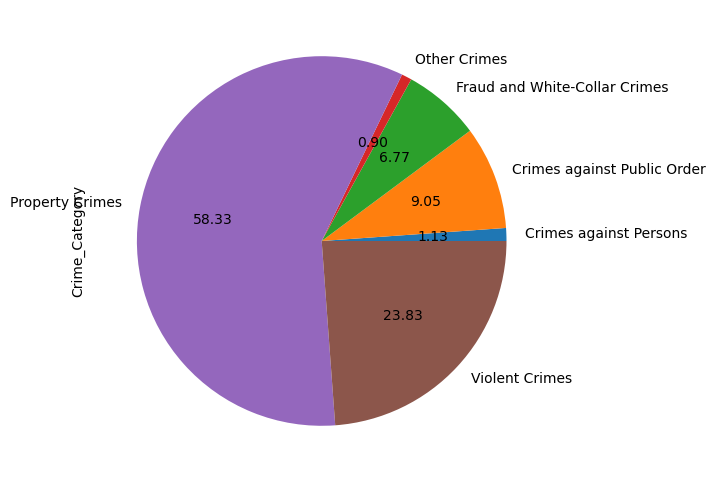

In [79]:
summ=train.groupby(['Crime_Category'])['Crime_Category'].count()
plt.figure(figsize=(25, 6))
summ.plot(kind='pie', autopct= '%.2f')

Text(0, 0.5, 'No. of reportings')

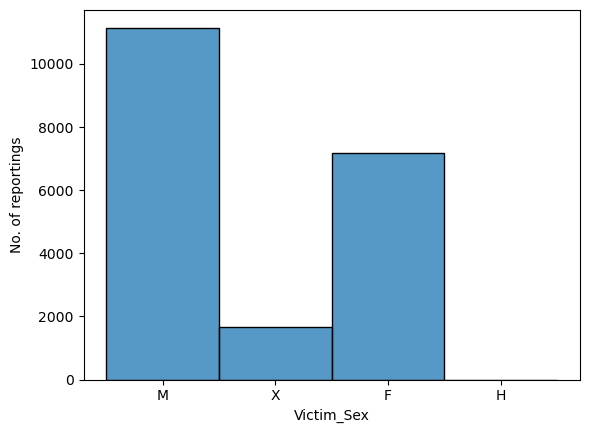

In [41]:
sns.histplot(train['Victim_Sex'])
plt.ylabel('No. of reportings')

In [36]:
def classify_age_group(age):
    if 0 <= age <= 5:
        return 'Infants'
    elif 6 <= age <= 17:
        return 'Children'
    elif 18 <= age <= 30:
        return 'Young Adults'
    elif 31 <= age <= 60:
        return 'Middle Aged'
    elif 61 <= age <= 99:
        return 'Elderly'
    else:
        return 'Unknown'


train['Age_Group'] = train['Victim_Age'].apply(classify_age_group)

Text(0, 0.5, 'No. of reportings')

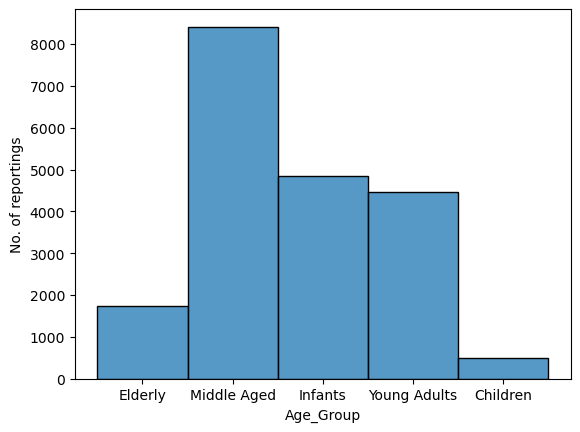

In [40]:
sns.histplot(train['Age_Group'])
plt.ylabel('No. of reportings')

Text(0, 0.5, 'No. of reportings')

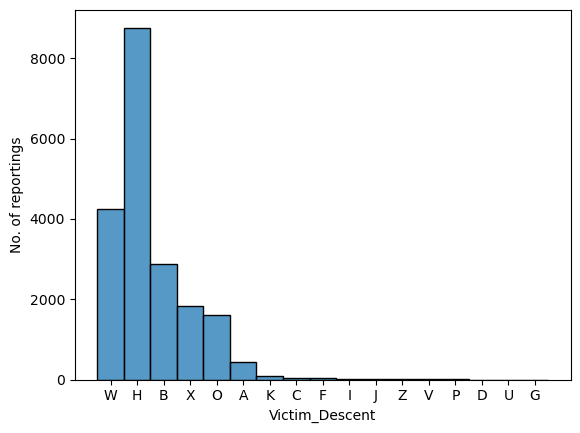

In [42]:
sns.histplot(train['Victim_Descent'])
plt.ylabel('No. of reportings')

Text(0, 0.5, 'No. of reportings')

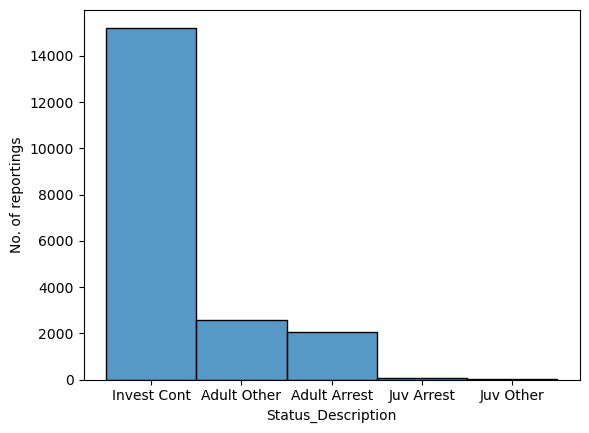

In [58]:
sns.histplot(train['Status_Description'])
plt.ylabel('No. of reportings')

<Axes: xlabel='Crime_Category', ylabel='Avg days in reporting'>

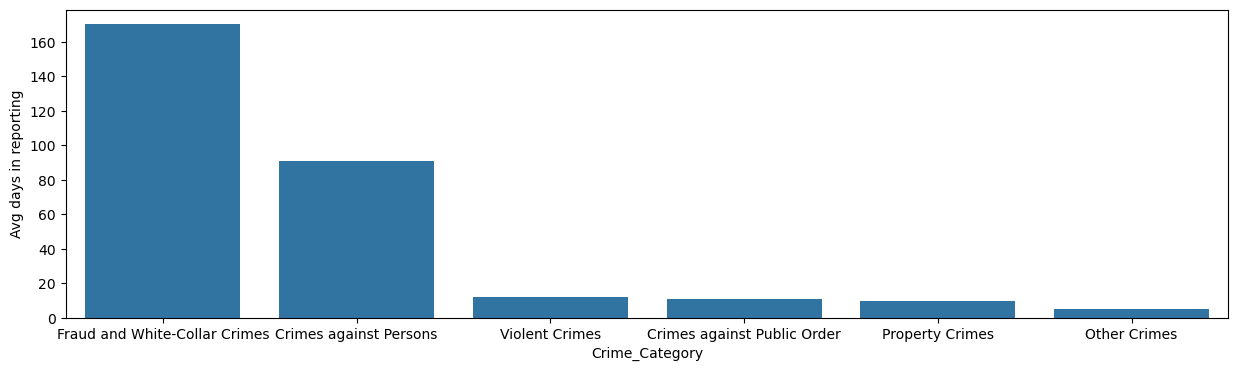

In [39]:
train['diff']=(train.Date_Reported-train.Date_Occurred).dt.days
plt.figure(figsize=(15, 4))
plt.ylabel('Avg days in reporting')
sns.barplot(train.groupby('Crime_Category')['diff'].mean().sort_values(ascending=False))

In [44]:
def classify_time_slot(time):
    if 400 <= time <= 759:
        return 'Early Morning'
    elif 800 <= time <= 1159:
        return 'Morning'
    elif 1200 <= time <= 1559:
        return 'Afternoon'
    elif 1600 <= time <= 1959:
        return 'Evening'
    elif 2000 <= time <= 2359:
        return 'Night'
    elif 1 <= time <= 359:
        return 'Late Night'
    else:
        return 'Unknown'


train['Time_Segments'] = train['Time_Occurred'].apply(classify_time_slot)

<Axes: xlabel='Time_Segments', ylabel='No. of reportings'>

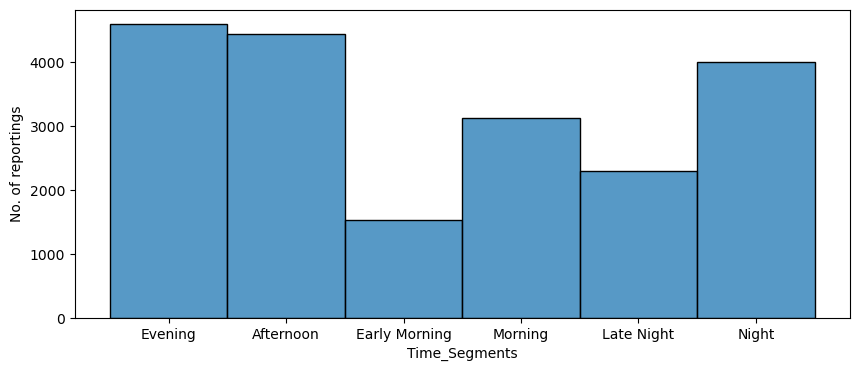

In [50]:
plt.figure(figsize=(10, 4))
plt.ylabel('No. of reportings')
sns.histplot(train['Time_Segments'])

<Axes: xlabel='Month of Reporting', ylabel='No. of reportings'>

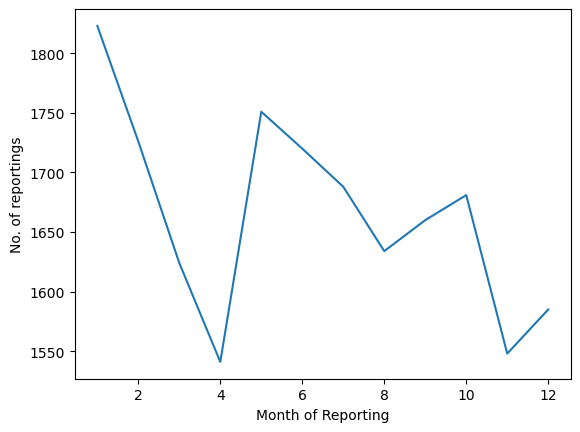

In [57]:
count=train.groupby(['Month_rep'])['Crime_Category'].count()
plt.xlabel('Month of Reporting')
plt.ylabel('No. of reportings')
sns.lineplot(x=count.index, y=count.values)

<Axes: xlabel='Weapon_Description', ylabel='Avg days in reporting'>

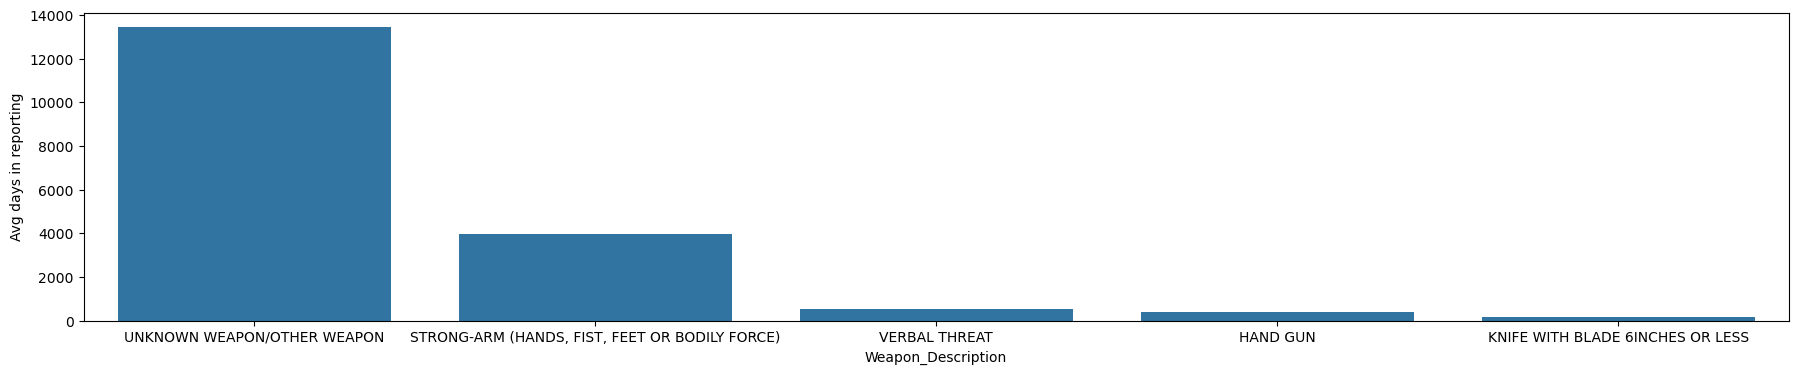

In [72]:
plt.figure(figsize=(22, 4))
plt.ylabel('Avg days in reporting')
sns.barplot(train.groupby(['Weapon_Description'])['Crime_Category'].count().nlargest(5))